<a href="https://colab.research.google.com/github/rpdieego/StockMarket_Analysis/blob/master/StockMarket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock market analysis

![alt text](https://i.kym-cdn.com/entries/icons/mobile/000/029/959/Screen_Shot_2019-06-05_at_1.26.32_PM.jpg)

# Step 1 - Defining the problem

**Context**

Imagine the following situation:

It`s February of 2015, and you have won R$ 50.000,00 in the lottery. You have no open dues , and also don't fancy buying anything special with this money, so you decide to invest it at the brazilian stock market.

However, you don`t know much about the stock market and investments, so you ask a friend for an advice, and he recomends you to invest your prize like this:


*   R$ 12.500,00 - VALE3 ( Vale do Rio Doce - ore mining company)

*   R$ 12.500,00 - ITUB4 ( Itau Unibanco Holding - holding company)

*   R$ 12.500,00 - ABEV3 ( Ambev - brewery company)

*   R$ 12.500,00 - PETR4 ( Petrobras - oil extraction company)

You have followed your friend advice and bought these extact value of each stock on 03/02/2015.

You are not going to invest any more money, and also are not going to sell or buy any other stocks since your investment until today.

**Questions**

*   How much value would your wallet have today?

*   Was it a good investment? Let`s compare it to the IBOVESPA index in order to check it




# Step 2 - Getting the data

I`m going to get the data from [yahoo finance](https://finance.yahoo.com/) using PanDas web datareader

In [0]:
# Import important packages
import pandas as pd
from pandas_datareader import data as web
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
# Create empty dataframes to store our data into

vale_df = pd.DataFrame()
itub_df = pd.DataFrame()
abev_df = pd.DataFrame()
petr_df = pd.DataFrame()
ibov_df = pd.DataFrame()

In [0]:
# Active in analysis
vale = 'VALE3.SA'
itub = 'ITUB4.SA'
abev = 'ABEV3.SA'
petr = 'PETR4.SA'
ibov = '^BVSP'

# Import data from Yahoo Finance

vale_df = web.DataReader(vale, data_source= 'yahoo', start = '03/01/2015')

itub_df = web.DataReader(itub, data_source= 'yahoo', start = '03/01/2015')

abev_df = web.DataReader(abev, data_source= 'yahoo', start = '03/01/2015')

petr_df = web.DataReader(petr, data_source= 'yahoo', start = '03/01/2015')

ibov_df = web.DataReader(ibov, data_source= 'yahoo', start = '03/01/2015')


Let`s check one of the datasets to see which features we have to each active:

In [0]:
# Checking the dataset

vale_df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,21.250000,20.389999,21.160000,20.559999,4685300.0,17.386084
2015-03-03,21.120001,20.620001,20.709999,20.790001,4441700.0,17.580578
2015-03-04,20.670000,20.090000,20.480000,20.389999,6035800.0,17.242327
2015-03-05,20.379999,19.389999,20.379999,19.500000,7140400.0,16.489721
2015-03-06,19.870001,19.070000,19.450001,19.590000,7622600.0,16.565826


We have the following features:

*   *Date* - Respective date of quotations;
*   *High* - Highest quoted value;
*   *Low* - Lowest quoted value;
*  *Open* - Initial quotation;
*   *Close* - Final quotation;
*   *Volume* - Number of stocks negotiaded at this date
*  *Adj Close* - Adjusted close price (closing price after adjustments for all applicable splits and dividend distributions);





In [0]:
# Checking the dimensions of the Datasets

print("VALE3 Dataset \n Variables:\t{}\n Inputs:\t{}".format(vale_df.shape[1], vale_df.shape[0]))
print("\n")
print("ITUB4 Dataset \n Variables:\t{}\n Inputs:\t{}".format(itub_df.shape[1], itub_df.shape[0]))
print("\n")
print("ABEV3 Dataset \n Variables:\t{}\n Inputs:\t{}".format(abev_df.shape[1], abev_df.shape[0]))
print("\n")
print("PETR4 Dataset \n Variables:\t{}\n Inputs:\t{}".format(petr_df.shape[1], petr_df.shape[0]))
print("\n")
print("IBOV Dataset \n Variables:\t{}\n Inputs:\t{}".format(ibov_df.shape[1], ibov_df.shape[0]))

VALE3 Dataset 
 Variables:	6
 Inputs:	1245


ITUB4 Dataset 
 Variables:	6
 Inputs:	1245


ABEV3 Dataset 
 Variables:	6
 Inputs:	1245


PETR4 Dataset 
 Variables:	6
 Inputs:	1245


IBOV Dataset 
 Variables:	6
 Inputs:	1240


# Step 3 - Exploring the Data

**Missing Values**

Let`s check if there are missing values in any of our datasets:

In [0]:
# Missing Values VALE3
(vale_df.isnull().sum() / vale_df.shape[0]).sort_values(ascending=False)*100

Adj Close    0.0
Volume       0.0
Close        0.0
Open         0.0
Low          0.0
High         0.0
dtype: float64

In [0]:
# Missing Values ITUB4
(itub_df.isnull().sum() / itub_df.shape[0]).sort_values(ascending=False)*100

Adj Close    0.0
Volume       0.0
Close        0.0
Open         0.0
Low          0.0
High         0.0
dtype: float64

In [0]:
# Missing Values ABEV3
(abev_df.isnull().sum() / abev_df.shape[0]).sort_values(ascending=False)*100

Adj Close    0.0
Volume       0.0
Close        0.0
Open         0.0
Low          0.0
High         0.0
dtype: float64

In [0]:
# Missing Values PETR4
(petr_df.isnull().sum() / petr_df.shape[0]).sort_values(ascending=False)*100

Adj Close    0.0
Volume       0.0
Close        0.0
Open         0.0
Low          0.0
High         0.0
dtype: float64

In [0]:
# Missing Values IBOV
(ibov_df.isnull().sum() / ibov_df.shape[0]).sort_values(ascending=False)*100

Adj Close    0.0
Volume       0.0
Close        0.0
Open         0.0
Low          0.0
High         0.0
dtype: float64

**Candlesticks charts**

How these actives have performed during this period? Let`s use candlestick charts to analyze each one:

In [0]:
# Candlestick Chart VALE3

trace_vale = {
          'x':vale_df.index,
          'open': vale_df.Open,
          'close': vale_df.Close,
          'high': vale_df.High,
          'low': vale_df.Low,
          'type': 'candlestick',
          'name': vale,
          'showlegend': False
         }

data_vale = [trace_vale]
layout = go.Layout()

fig = go.Figure(data=data_vale, layout=layout)
fig.update_layout(title = 'VALE3')
fig.show()

In [0]:
# Candlestick Chart ITUB4

trace_itub = {
          'x':itub_df.index,
          'open': itub_df.Open,
          'close': itub_df.Close,
          'high': itub_df.High,
          'low': itub_df.Low,
          'type': 'candlestick',
          'name': itub,
          'showlegend': False
         }

data_itub = [trace_itub]
layout = go.Layout()

fig = go.Figure(data=data_itub, layout=layout)
fig.update_layout(title = 'ITUB4')
fig.show()

In [0]:
# Candlestick Chart ABEV3

trace_abev = {
          'x':abev_df.index,
          'open': abev_df.Open,
          'close': abev_df.Close,
          'high': abev_df.High,
          'low': abev_df.Low,
          'type': 'candlestick',
          'name': abev,
          'showlegend': False
         }

data_abev = [trace_abev]
layout = go.Layout()

fig = go.Figure(data=data_abev, layout=layout)
fig.update_layout(title = 'ABEV3')
fig.show()

In [0]:
# Candlestick Chart PETR4

trace_petr = {
          'x':petr_df.index,
          'open': petr_df.Open,
          'close': petr_df.Close,
          'high': petr_df.High,
          'low': petr_df.Low,
          'type': 'candlestick',
          'name': petr,
          'showlegend': False
         }

data_petr = [trace_petr]
layout = go.Layout()

fig = go.Figure(data=data_petr, layout=layout)
fig.update_layout(title = 'PETR4')
fig.show()

In [0]:
# Candlestick Chart BVSP

trace_ibov = {
          'x':ibov_df.index,
          'open': ibov_df.Open,
          'close': ibov_df.Close,
          'high': ibov_df.High,
          'low': ibov_df.Low,
          'type': 'candlestick',
          'name': ibov,
          'showlegend': False
         }

data_ibov = [trace_ibov]
layout = go.Layout()

fig = go.Figure(data=data_ibov, layout=layout)
fig.update_layout(title = '^BVSP')
fig.show()

**Wallet**

I`m going to create a new dataframe with the Adjusted close price of each active, which is going to represent our investment wallet.

In order to analyze the wallet's performance, I`m going to normalize the adjusted prices by the buying price (quotation of the active at the day it was bought) and and multiply it by the value invested ( R$ 12.500,00 ).

I`m going to do the same with the ^BVSP index, but intead of invested value on a single active , I'm going to multiply by the total invested value ( R$ 50.000,00 ).

Then, I`m going to compare the total value of te wallet with the ^BVSP index, in order to check the performance of the investment.

*(It`s not possible to buy ^BVSP, however we are using it as a metric parameter because BOVA11 data on yahoo finance is not complete and would compromise our analysis)*

In [0]:
vale_adjc = vale_df["Adj Close"]
itub_adjc = itub_df["Adj Close"]
abev_adjc = abev_df["Adj Close"]
petr_adjc = petr_df["Adj Close"]
ibov_adjc = ibov_df["Adj Close"]

#Creating our walled dataframe
wallet_df = pd.concat([vale_adjc,itub_adjc,abev_adjc,petr_adjc], axis=1)

# Changing the column names
wallet_df.columns = ['VALE3','ITUB4','ABEV3','PETR4']

In [0]:
#Checking the 5 first rows of our dataset
wallet_df.head(5)

,VALE3,ITUB4,ABEV3,PETR4,Total Value
Date,,,,,
2015-03-02,12500.000000,12500.000000,12500.000000,12500.000000,50000.000000
2015-03-03,12639.834718,12596.379351,12727.903680,12699.044864,50663.162613
2015-03-04,12396.643725,12486.262173,12645.030513,12300.955136,49828.891547
2015-03-05,11855.546133,12376.131769,12679.558150,12261.147800,49172.383852
2015-03-06,11910.263112,12045.684712,12589.781735,12274.418276,48820.147834


In [0]:
# Normalizing the adjusted price by the buy value (2015-03-02) and multiply by the invested value

wallet_df = (wallet_df / wallet_df.iloc[0])*12500

wallet_df.head(5)

,VALE3,ITUB4,ABEV3,PETR4
Date,,,,
2015-03-02,12500.000000,12500.000000,12500.000000,12500.000000
2015-03-03,12639.834718,12596.379351,12727.903680,12699.044864
2015-03-04,12396.643725,12486.262173,12645.030513,12300.955136
2015-03-05,11855.546133,12376.131769,12679.558150,12261.147800
2015-03-06,11910.263112,12045.684712,12589.781735,12274.418276


In [0]:
 # Create a column with the wallet`s total value

wallet_df["Total Value"] = wallet_df.sum(axis=1)

wallet_df.head(5)

,VALE3,ITUB4,ABEV3,PETR4,Total Value
Date,,,,,
2015-03-02,12500.000000,12500.000000,12500.000000,12500.000000,50000.000000
2015-03-03,12639.834718,12596.379351,12727.903680,12699.044864,50663.162613
2015-03-04,12396.643725,12486.262173,12645.030513,12300.955136,49828.891547
2015-03-05,11855.546133,12376.131769,12679.558150,12261.147800,49172.383852
2015-03-06,11910.263112,12045.684712,12589.781735,12274.418276,48820.147834


In [0]:
# Let`s do the same to the Ibov index

ibov_adjc = (ibov_adjc / ibov_adjc.iloc[0])*50000

In [0]:
ibov_adjc

Date
2015-03-02     50000.000000
2015-03-03     50277.336783
2015-03-04     49458.066286
2015-03-05     49357.127457
2015-03-06     48980.811823
                  ...      
2020-02-28    102087.375786
2020-03-02    104491.287901
2020-03-03    103425.060269
2020-03-04    105078.301092
2020-03-05    101649.389773
Name: Adj Close, Length: 1240, dtype: float64

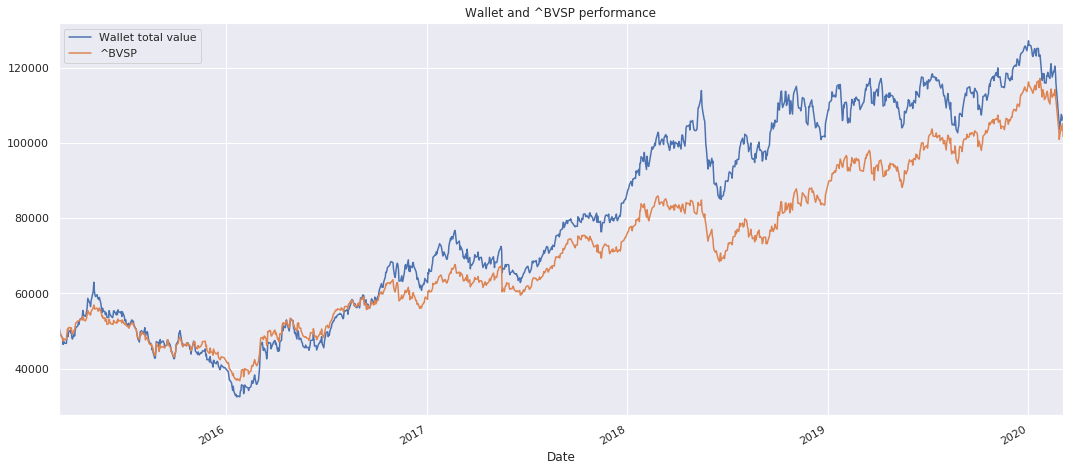

In [0]:
# Plotting Wallet x Ibovespa

wallet_df['Total Value'].plot(figsize=(18,8), label = "Wallet total value");
ibov_adjc.plot(label = "^BVSP");
plt.legend();
plt.title("Wallet and ^BVSP performance");

We can see in te graph above that our wallet have performed in a very similar way to ^BVSP from the beggining of the investment until late 2016.

From this point on, the wallet had a way better performance, until the beggining of 2020, where it`s total value came once again closer to the ibovesp index.


**How much our wallet worth today?**

In [0]:
# Updated Total Value
wallet_df['Total Value'].iloc[-1]

106949.31265842298

In [0]:
# Wallet Profit [%]
wallet_profit = ((wallet_df['Total Value'].iloc[-1]-wallet_df['Total Value'].iloc[0]) / wallet_df['Total Value'].iloc[0])*100
wallet_profit

113.89862531684597



*   Current wallet`s value : **R$ 106.949,31**
*   Investment Profit: **113.90 %**



**How much a wallet with ^BVSP would worth today?**

In [0]:
# ^BVSP updated value
ibov_adjc.iloc[-1]

101649.38977332863

In [0]:
# ^BVSP Profit [%]
ibov_profit = ((ibov_adjc.iloc[-1]-ibov_adjc.iloc[0]) / ibov_adjc.iloc[0]) *100
ibov_profit

103.29877954665724

*   Current wallet`s value : **R$ 101.649,39**
*   Investment Profit: **103.30 %**

**Is our wallet correlated to the ibovespa index?**

Let`s check the correlation between the total value of our wallet and the ^BVSP:

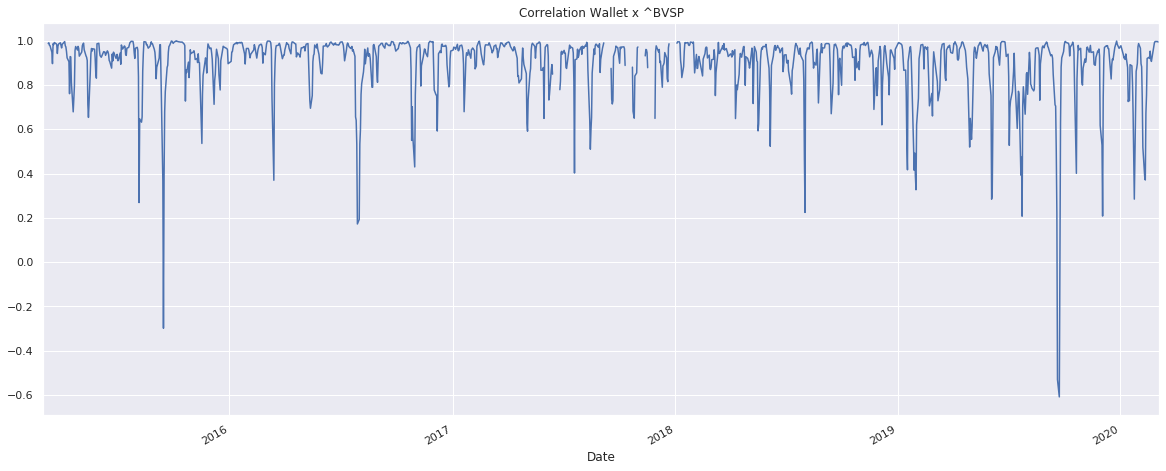

In [0]:
wallet_df['Total Value'].rolling(7).corr(ibov_adjc).plot(figsize=(20,8));
plt.title("Correlation Wallet x ^BVSP");

It`s possible to see that the correlation between the wallet and ^BVSP is quite constant arround 0.8 ~ 1.0, with sime negative pikes.

It means that, the performances of the wallet and ^BVSP were moving together most of the time during the analized time interval. In other words, when the ^BVSP index increased, the total value of our wallet increased as well.

In [0]:
# lets create another column for the % return

wallet_df['Return'] = wallet_df['Total Value'].pct_change()
wallet_df['Return'][0] = 0
wallet_df.head(5)

,VALE3,ITUB4,ABEV3,PETR4,Total Value,return,Return
Date,,,,,,,
2015-03-02,12500.000000,12500.000000,12500.000000,12500.000000,50000.000000,0.000000,0.000000
2015-03-03,12639.834718,12596.379351,12727.903680,12699.044864,50663.162613,0.013263,0.013263
2015-03-04,12396.643725,12486.262173,12645.030513,12300.955136,49828.891547,-0.016467,-0.016467
2015-03-05,11855.546133,12376.131769,12679.558150,12261.147800,49172.383852,-0.013175,-0.013175
2015-03-06,11910.263112,12045.684712,12589.781735,12274.418276,48820.147834,-0.007163,-0.007163


In [0]:
return_ibov = ibov_adjc.pct_change()

In [0]:
ibov_df_2 = pd.concat([ibov_adjc,return_ibov], axis=1)
ibov_df_2.columns = ["^BVSP", "Return"]
ibov_df_2['Return'][0] = 0
ibov_df_2.head(5)

,^BVSP,Return
Date,,
2015-03-02,50000.000000,0.000000
2015-03-03,50277.336783,0.005547
2015-03-04,49458.066286,-0.016295
2015-03-05,49357.127457,-0.002041
2015-03-06,48980.811823,-0.007624


In [0]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

Start date,2015-03-02
End date,2020-03-05
Total months,59
,Backtest
Annual return,16.6%
Cumulative returns,113.9%
Annual volatility,28.1%
Sharpe ratio,0.69
Calmar ratio,0.34
Stability,0.88
Max drawdown,-48.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,48.43,2015-05-05,2016-01-21,2016-10-17,380
1,25.41,2018-05-16,2018-06-21,2018-11-05,124
2,18.48,2020-01-02,2020-02-27,NaT,NaN
3,18.05,2017-02-21,2017-06-20,2017-09-01,139
4,13.25,2019-07-11,2019-08-26,2019-11-04,83


Stress Events,mean,min,max
Fall2015,-0.19%,-3.85%,6.04%
New Normal,0.08%,-8.53%,8.43%


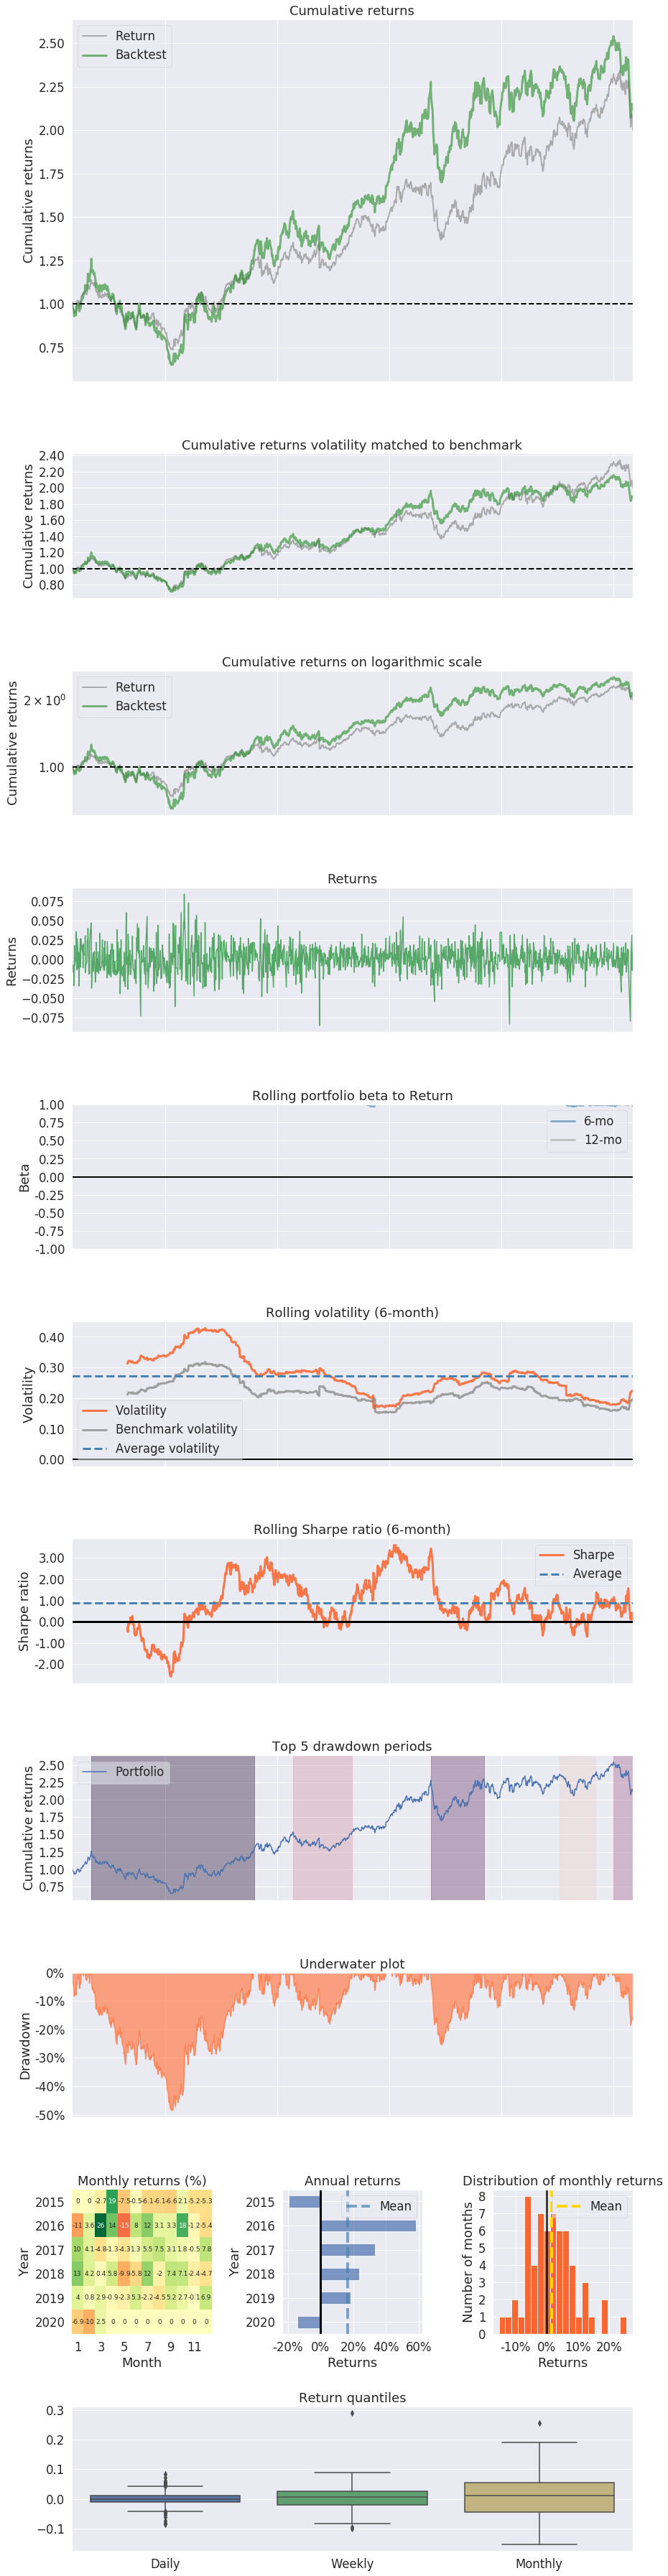

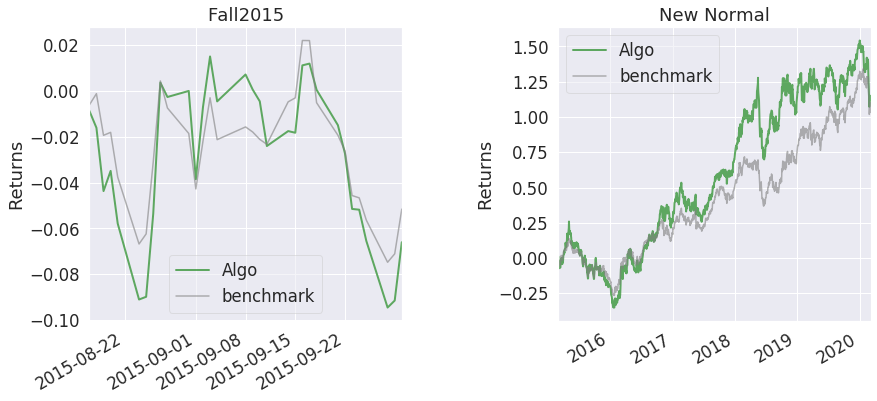

In [0]:
pf.create_full_tear_sheet(wallet_df["Return"], benchmark_rets=ibov_df_2["Return"])